In [251]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

In [253]:
# Read the data 
DF_CAR = pd.read_csv('CarPrice_Assignment.csv')
DF_CAR.shape

(205, 26)

In [254]:
# Analyse the data
pd.set_option('display.max_columns', 500)
DF_CAR.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [255]:
DF_CAR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

# Data Analysis and Preparation 

In [256]:
# step 1 : Check for null values for rows and columns
print(DF_CAR.isnull().sum(axis = 0))

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [257]:
# Step 2 : Check for duplicate rows
print(DF_CAR.shape)
DF_CAR.drop_duplicates(keep='first',inplace=True)
print(DF_CAR.shape)

# As we can see number of rows and columns are still same. There are no duplicate present in the data 

(205, 26)
(205, 26)


In [258]:
# Step 3: Seperate the car comapny name from car model. Creating a sepeate column  'CarCompany'

DF_CAR['CarName'] =DF_CAR['CarName'].str.split(' ')
DF_CAR['CarCompany'] =DF_CAR['CarName'].str[0]

DF_CAR.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,"[alfa-romero, giulia]",gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,"[alfa-romero, stelvio]",gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,"[alfa-romero, Quadrifoglio]",gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,"[audi, 100, ls]",gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,"[audi, 100ls]",gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [259]:
# Check the list of the car companies. As we can observe there are lots of spelling mistake in data 
#  which leads to a seprate entry for eg 

#Nissan and nissan
#maxda', 'mazda'
#'toyota', 'toyouta',
#vokswagen', 'volkswagen,vw
#'porsche','porcshce'
#
print(DF_CAR.CarCompany.value_counts())
print(DF_CAR.CarCompany.unique())

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
jaguar          3
chevrolet       3
alfa-romero     3
maxda           2
renault         2
vw              2
toyouta         1
vokswagen       1
porcshce        1
Nissan          1
mercury         1
Name: CarCompany, dtype: int64
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [260]:
# replace the CarCompany name with correct spelling
DF_CAR['CarCompany'] = DF_CAR['CarCompany'].str.replace("toyouta", 'toyota')
DF_CAR['CarCompany'] = DF_CAR['CarCompany'].str.replace("maxda", 'mazda')
DF_CAR['CarCompany'] = DF_CAR['CarCompany'].str.replace("Nissan", 'nissan')
DF_CAR['CarCompany'] = DF_CAR['CarCompany'].str.replace("vokswagen", 'volkswagen')
DF_CAR['CarCompany'] = DF_CAR['CarCompany'].str.replace("vw", 'volkswagen')
DF_CAR['CarCompany'] = DF_CAR['CarCompany'].str.replace("porcshce", 'porsche')

# Check if they are correctly replaced 
DF_CAR.CarCompany.unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [261]:
# Drop the original column as it is not required
DF_CAR.drop(['CarName','car_ID'], axis = 1, inplace = True)

In [262]:
DF_CAR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg    

# Handling Categorical Data 

In [263]:
# Handling Categorical Data 

# Binary category
print(DF_CAR.fueltype.value_counts()) # fueltype - gas diesel
print(DF_CAR.aspiration.value_counts()) # aspiration - std turbo
print(DF_CAR.doornumber.value_counts())  # doornumber four two
print(DF_CAR.enginelocation.value_counts()) # enginelocation front rear
print(DF_CAR.drivewheel.value_counts())  # drivewheel rwd fwd 4wd

# Non Ordinal Categories
print(DF_CAR.carbody.value_counts())  #carbody - sedan hatchback wagon hardtop convertible
print(DF_CAR.enginetype.value_counts())  # enginetype- ohc ohcf ohcv dohc rotor dohcv l 
print(DF_CAR.fuelsystem.value_counts())  # fuelsystem mpfi 2bbl  idi 1bbl spdi 4bbl spfi mfi
print(DF_CAR.CarCompany.value_counts())


# Ordinal Categories
print(DF_CAR.cylindernumber.value_counts())  # cylindernumber  four six five eight two three twelve
print(DF_CAR.symboling.value_counts())  # symboling 0 1 2 3 -1 -2

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64
toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevr

# Non Ordinal Categories: Combining the categories based on frequency

In [264]:
# Non Ordinal Categories

# Combining the categories based on frequency...Low frequncy has been combined into a new category called 'others'

# enginetype 
series = pd.value_counts(DF_CAR.enginetype)
mask = (series/series.sum() * 100).lt(10)  # having freq less then 10%
# To replace df['column'] use np.where I.e 
DF_CAR['enginetype'] = np.where(DF_CAR['enginetype'].isin(series[mask].index),'enginetypeOther',DF_CAR['enginetype'])
print(DF_CAR['enginetype'].value_counts())

#fuelsystem
series = pd.value_counts(DF_CAR.fuelsystem)
mask = (series/series.sum() * 100).lt(5) # having freq less then 5%
DF_CAR['fuelsystem'] = np.where(DF_CAR['fuelsystem'].isin(series[mask].index),'fuelsystemOther',DF_CAR['fuelsystem'])
print(DF_CAR['fuelsystem'].value_counts())

# carbody
series = pd.value_counts(DF_CAR.carbody)
mask = (series/series.sum() * 100).lt(10) # having freq less then 10%
DF_CAR['carbody'] = np.where(DF_CAR['carbody'].isin(series[mask].index),'carbodyOther',DF_CAR['carbody'])
print(DF_CAR['carbody'].value_counts())

# CarCompany
series = pd.value_counts(DF_CAR.CarCompany)
mask = (series/series.sum() * 100).lt(2)  # having freq less then 2%
DF_CAR['CarCompany'] = np.where(DF_CAR['CarCompany'].isin(series[mask].index),'CarCompanyOther',DF_CAR['CarCompany'])
print(DF_CAR.CarCompany.value_counts())


# Converting these columns back to string type so as to feed them into get dummy function to create dummy coulmns

DF_CAR['fuelsystem'] = DF_CAR['fuelsystem'].astype(str)
DF_CAR['enginetype'] = DF_CAR['enginetype'].astype(str)
DF_CAR['carbody'] = DF_CAR['carbody'].astype(str)
DF_CAR['CarCompany'] = DF_CAR['CarCompany'].astype(str)

ohc                148
enginetypeOther     57
Name: enginetype, dtype: int64
mpfi               94
2bbl               66
idi                20
fuelsystemOther    14
1bbl               11
Name: fuelsystem, dtype: int64
sedan           96
hatchback       70
wagon           25
carbodyOther    14
Name: carbody, dtype: int64
toyota             32
nissan             18
mazda              17
CarCompanyOther    16
honda              13
mitsubishi         13
volkswagen         12
subaru             12
volvo              11
peugeot            11
dodge               9
bmw                 8
buick               8
plymouth            7
audi                7
saab                6
porsche             5
Name: CarCompany, dtype: int64


In [265]:
# Check the data type
DF_CAR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg    

# Label Encoding done for Ordinal categories

In [266]:
# Label Encoding done for Ordinal categories

le = LabelEncoder()#use this encoder to encode values

DF_CAR['cylindernumber'] = le.fit_transform(DF_CAR['cylindernumber'])
DF_CAR['symboling'] = le.fit_transform(DF_CAR['symboling'])

# Check if Label encoding is done
DF_CAR['cylindernumber'].value_counts()
DF_CAR['symboling'].value_counts()

2    67
3    54
4    32
5    27
1    22
0     3
Name: symboling, dtype: int64

# Creating Dummy Categorical variable for Binary and Non Ordinal categories

In [267]:
#Creating Dummy Categorical variable

# Below is the List of variables to map

# fueltype - gas diesel
# aspiration - std turbo
# doornumber four two
# enginelocation front rear
# drivewheel rwd fwd 4wd
# CarName- 147
# symboling 0 1 2 3 -1 -2
# carbody - sedan hatchback wagon hardtop convertible
# enginetype- ohc ohcf ohcv dohc rotor dohcv l 
# fuelsystem mpfi 2bbl  idi 1bbl spdi 4bbl spfi mfi
# cylindernumber  four six five eight two three twelve



# Get dummies
DF_CAR = pd.get_dummies(DF_CAR, prefix_sep='_', drop_first=True)

# DF_CAR head
DF_CAR.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_ohc,fuelsystem_2bbl,fuelsystem_fuelsystemOther,fuelsystem_idi,fuelsystem_mpfi,CarCompany_audi,CarCompany_bmw,CarCompany_buick,CarCompany_dodge,CarCompany_honda,CarCompany_mazda,CarCompany_mitsubishi,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
0,5,88.6,168.8,64.1,48.8,2548,2,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,88.6,168.8,64.1,48.8,2548,2,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,94.5,171.2,65.5,52.4,2823,3,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,99.8,176.6,66.2,54.3,2337,2,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,99.4,176.6,66.4,54.3,2824,1,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Splitting the Data into Training and Testing Sets

In [268]:
# Splitting the dataset into train : test ratio of 70:30 respectively
df_train, df_test = train_test_split(DF_CAR, train_size = 0.7, test_size = 0.3, random_state = 10)

### Rescaling the Features 

lets use MinMax scaling.

In [269]:
scaler = MinMaxScaler()
# Apply scaler() to all the numeric columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_ohc,fuelsystem_2bbl,fuelsystem_fuelsystemOther,fuelsystem_idi,fuelsystem_mpfi,CarCompany_audi,CarCompany_bmw,CarCompany_buick,CarCompany_dodge,CarCompany_honda,CarCompany_mazda,CarCompany_mitsubishi,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
43,0.4,0.224490,0.441791,0.128205,0.427273,0.329325,0.333333,0.202429,0.550000,0.552381,0.093750,0.188679,0.265306,0.285714,0.342105,0.041383,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78,0.8,0.206997,0.241791,0.350427,0.181818,0.200155,0.333333,0.125506,0.307143,0.552381,0.150000,0.125786,0.551020,0.485714,0.578947,0.038504,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
143,0.4,0.309038,0.461194,0.435897,0.336364,0.330489,0.333333,0.190283,0.771429,0.271429,0.125000,0.289308,0.428571,0.342857,0.421053,0.120203,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
21,0.6,0.206997,0.241791,0.299145,0.181818,0.150504,0.333333,0.117409,0.307143,0.552381,0.150625,0.125786,0.551020,0.657143,0.657895,0.011271,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
128,1.0,0.084548,0.414925,0.401709,0.254545,0.508922,0.500000,0.538462,0.857143,0.395238,0.156250,1.000000,0.714286,0.085714,0.236842,0.792165,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# Dividing into X and Y sets for the model building

In [270]:
y_train = df_train.pop('price')
X_train = df_train

## Building our model  using  RFE  Recursive feature elimination

In [271]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE, Extracting the 15 useful feature
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [272]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 29),
 ('wheelbase', False, 2),
 ('carlength', False, 5),
 ('carwidth', True, 1),
 ('carheight', False, 14),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 20),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 12),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', False, 10),
 ('fueltype_gas', True, 1),
 ('aspiration_turbo', False, 13),
 ('doornumber_two', False, 30),
 ('carbody_hatchback', False, 6),
 ('carbody_sedan', False, 8),
 ('carbody_wagon', False, 7),
 ('drivewheel_fwd', False, 17),
 ('drivewheel_rwd', False, 28),
 ('enginelocation_rear', True, 1),
 ('enginetype_ohc', False, 27),
 ('fuelsystem_2bbl', False, 21),
 ('fuelsystem_fuelsystemOther', False, 24),
 ('fuelsystem_idi', True, 1),
 ('fuelsystem_mpfi', False, 23),
 ('CarCompany_audi', True, 1),
 ('CarCompany_bmw', True, 1),
 ('CarCompany_buick', True, 1),
 ('CarCompany_dodge', False, 15),
 ('CarCompany_honda

In [273]:
# list of Columns supported by RFE
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'stroke',
       'compressionratio', 'peakrpm', 'citympg', 'fueltype_gas',
       'enginelocation_rear', 'fuelsystem_idi', 'CarCompany_audi',
       'CarCompany_bmw', 'CarCompany_buick', 'CarCompany_porsche'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics  

### Manually removing the columns one by one which are less significant  

### Rule followed

1. High P value -Drop these var first one by one
2. Low P value, High VIF - Drop these var one by one after first step is over 
3. Low P value , Low VIF Keep them 
4. Acceptable P value < 0.05, Acceptable VIF  value < 5

In [274]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [275]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     129.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.41e-68
Time:                        21:41:35   Log-Likelihood:                 223.98
No. Observations:                 143   AIC:                            -418.0
Df Residuals:                     128   BIC:                            -373.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1193    

In [276]:
# Remove fuelsystem_idi
#fuelsystem_idi has High P values lets drop it.
X_train_rfe = X_train_rfe.drop(["fuelsystem_idi"], axis = 1)

# Rebuliding the model - Attempt1

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     129.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.41e-68
Time:                        21:41:35   Log-Likelihood:                 223.98
No. Observations:                 143   AIC:                            -418.0
Df Residuals:                     128   BIC:                            -373.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1153    

In [277]:
# Remove fueltype_gas
#fueltype_gas has High P values lets drop it.
X_train_rfe = X_train_rfe.drop(["fueltype_gas"], axis = 1)

# Rebuliding the model - Attempt2

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     139.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.57e-69
Time:                        21:41:35   Log-Likelihood:                 223.32
No. Observations:                 143   AIC:                            -418.6
Df Residuals:                     129   BIC:                            -377.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2490    

In [278]:
# Remove compressionratio
#compressionratio has High P values lets drop it.
X_train_rfe = X_train_rfe.drop(["compressionratio"], axis = 1)

# Rebuliding the model - Attempt3

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     151.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.95e-70
Time:                        21:41:35   Log-Likelihood:                 223.28
No. Observations:                 143   AIC:                            -420.6
Df Residuals:                     130   BIC:                            -382.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2546    

In [279]:
# Remove stroke
#stroke has High P values lets drop it.
X_train_rfe = X_train_rfe.drop(["stroke"], axis = 1)

# Rebuliding the model - Attempt4

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     162.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.18e-70
Time:                        21:41:35   Log-Likelihood:                 221.45
No. Observations:                 143   AIC:                            -418.9
Df Residuals:                     131   BIC:                            -383.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2689    

In [280]:
# Remove citympg
#citympg has High P values lets drop it.
X_train_rfe = X_train_rfe.drop(["citympg"], axis = 1)

# Rebuliding the model - Attempt5

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     176.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.92e-71
Time:                        21:41:36   Log-Likelihood:                 220.11
No. Observations:                 143   AIC:                            -418.2
Df Residuals:                     132   BIC:                            -385.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2157    

In [281]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



,Features,VIF
0,const,35.52
2,curbweight,7.18
4,enginesize,5.83
1,carwidth,5.23
6,enginelocation_rear,3.33
10,CarCompany_porsche,3.10
9,CarCompany_buick,2.44
3,cylindernumber,1.81
8,CarCompany_bmw,1.36
7,CarCompany_audi,1.23


In [282]:
# Remove curbweight
#curbweight has High VIF values lets drop it.
X_train_rfe = X_train_rfe.drop(["curbweight"], axis = 1)


# Rebuliding the model - Attempt6

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     173.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.95e-69
Time:                        21:41:36   Log-Likelihood:                 211.68
No. Observations:                 143   AIC:                            -403.4
Df Residuals:                     133   BIC:                            -373.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2326    

In [283]:

# Remove CarCompany_porsche
#CarCompany_porsche has High P values lets drop it.
X_train_rfe = X_train_rfe.drop(["CarCompany_porsche"], axis = 1)

# Rebuliding the model- - Attempt7

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     192.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.40e-69
Time:                        21:41:36   Log-Likelihood:                 210.17
No. Observations:                 143   AIC:                            -402.3
Df Residuals:                     134   BIC:                            -375.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2360    

In [284]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,34.50
3,enginesize,4.05
1,carwidth,2.87
8,CarCompany_buick,2.30
2,cylindernumber,1.78
7,CarCompany_bmw,1.36
5,enginelocation_rear,1.34
6,CarCompany_audi,1.23
4,peakrpm,1.17


In [285]:
# As Observed from the above data summary of P value and VIF We have reached to a stable Model .

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), 
let us plot the histogram of the error terms and see what it looks like.

In [286]:
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

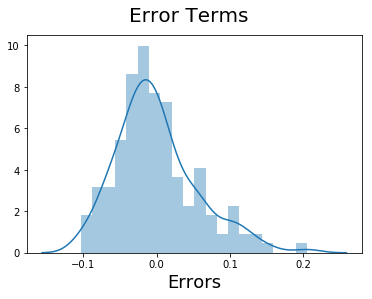

In [287]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Error terms are normalized

## Making Predictions


#### Applying the scaling on the test sets

In [288]:
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']

# Apply MinMaxScaling on test data 

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_ohc,fuelsystem_2bbl,fuelsystem_fuelsystemOther,fuelsystem_idi,fuelsystem_mpfi,CarCompany_audi,CarCompany_bmw,CarCompany_buick,CarCompany_dodge,CarCompany_honda,CarCompany_mazda,CarCompany_mitsubishi,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
131,0.8,0.276968,0.532836,0.538462,0.154545,0.377036,0.333333,0.287449,0.657143,0.871429,0.10625,0.264151,0.387755,0.257143,0.394737,0.118589,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
117,0.4,0.623907,0.680597,0.683761,0.654545,0.636928,0.333333,0.295547,0.764286,0.542857,0.00000,0.591195,0.591837,0.114286,0.210526,0.323519,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
63,0.4,0.355685,0.547761,0.529915,0.609091,0.370442,0.333333,0.246964,0.607143,0.628571,0.98125,0.100629,0.204082,0.628571,0.684211,0.140931,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
56,1.0,0.253644,0.416418,0.461538,0.072727,0.346005,1.000000,0.036437,0.564286,0.564286,0.15000,0.333333,0.755102,0.085714,0.184211,0.166998,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
49,0.4,0.448980,0.755224,0.880342,-0.090909,0.955004,0.833333,1.072874,0.714286,0.328571,0.28125,1.345912,0.346939,-0.028571,0.026316,0.766645,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Dividing into X_test and y_test

In [289]:
# seperate the price columns as y_test
y_test = df_test.pop('price')

# Consider rest of the dataset as X_test
X_test = df_test
X_test.shape

(62, 45)

In [290]:
# Now let's use our model to make predictions.
#X_train_new.drop('const',axis =1)
# Creating X_test_new dataframe by dropping variables from X_test
cols = X_train_rfe.drop('const',axis =1).columns
X_test_new = X_test[cols]

# Adding a constant variable 
X_test_lm = sm.add_constant(X_test_new)
X_test_lm.head()

,const,carwidth,cylindernumber,enginesize,peakrpm,enginelocation_rear,CarCompany_audi,CarCompany_bmw,CarCompany_buick
131,1.0,0.538462,0.333333,0.287449,0.387755,0,0,0,0
117,1.0,0.683761,0.333333,0.295547,0.591837,0,0,0,0
63,1.0,0.529915,0.333333,0.246964,0.204082,0,0,0,0
56,1.0,0.461538,1.000000,0.036437,0.755102,0,0,0,0
49,1.0,0.880342,0.833333,1.072874,0.346939,0,0,0,0


In [291]:
# Making predictions
y_test_pred = lm.predict(X_test_lm)


## Model Evaluation

Text(0, 0.5, 'y_test_pred')

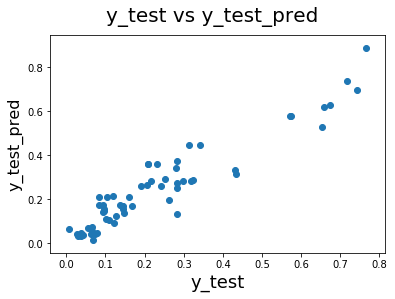

In [292]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [293]:
# Check the r2 score on train and test and model should perform well on the test dataset.

r_squared_train = r2_score(y_train, y_train_pred)
print('r_square_train :',r_squared_train)

r_squared_test = r2_score(y_test, y_test_pred)
print('r_square_test :',r_squared_test)



r_square_train : 0.9199757323157123
r_square_test : 0.882720713074766


# Summary:

# r_square_train : 0.9199757323157123
# r_square_test : 0.882720713074766

# As r2 score for train and test data set are quite close this model is performing good

# Below is the final model which defines Car Price 

## Feature     Coeff
### enginesize	4.05
### carwidth	2.87
### CarCompany_buick	2.30
### cylindernumber	1.78
### CarCompany_bmw	1.36
### enginelocation_rear	1.34
### CarCompany_audi	1.23
### peakrpm	1.17
